Actual Value :1 and Predicted value is :0
Actual Value :1 and Predicted value is :0
Actual Value :0 and Predicted value is :0
accuracy : 0.3333333333333333


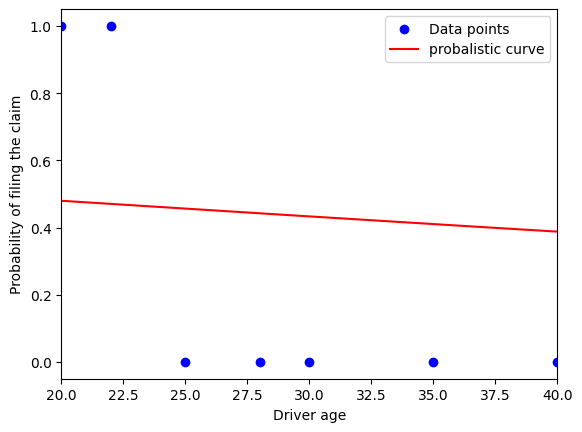

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=np.array([[18],[20],[22],[25],[28],[30],[35],[40],[45],[50]])
y=np.array([1,1,1,0,0,0,0,0,1,1])

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

for actual,pred in zip(y_test,y_pred):
    print(f'Actual Value :{actual} and Predicted value is :{pred}')

accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy : {accuracy}")

plt.scatter(X,y,color='blue',label='Data points')
x_range = np.linspace(15,55,200).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]
plt.plot(x_range,y_prob,color='red',label='probalistic curve')
plt.xlabel('Driver age')
plt.ylabel('Probability of filing the claim')
plt.xlim(20,40)
plt.legend()
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # feature engineering skill
# (x - u(meu)) / sigma()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=[[5,2,3],[4,1,4],[1,5,2],[2,4,1],[5,1,5],
   [3,5,1],[1,4,3],[5,3,4],[2,1,4],[3,4,2]]
y=[1,1,0,0,1,0,0,1,1,0]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit_transform is for training data
X_test = scaler.transform(X_test) # transform  is for testing the data

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

# Best model — predict new user
best_knn = KNeighborsClassifier(n_neighbors=3)      # Hyper parameter fitting
best_knn.fit(X_train, y_train)
new_user = scaler.transform([[4, 2, 4]])
print("Will they like it?", best_knn.predict(new_user)[0])


# DECISION TREE

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = [
    [720, 60, 1], [580, 35, 0], [700, 55, 1],
    [600, 40, 1], [750, 80, 1], [500, 25, 0],
    [680, 50, 1], [550, 30, 0], [730, 70, 1],
    [610, 42, 0],
]
y = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

tree = DecisionTreeClassifier(max_depth=3,criterion='gini') # max depth controls the overfitting
tree.fit(X_train,y_train)

# evaluate

y_pred = tree.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred))

# New Application

applicant = [[690,52,1]]
decision=tree.predict(applicant)
print("Decision:","Approved" if decision[0]==1 else "Rejected")

Accuracy 1.0
Decision: Approved


In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("Dataset/data/University Dataset - Sheet1.csv")
X=df[['HighSchool_GPA','Exam_Score','Extracurriculars']]
y=df['Admission_Label']
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

tree = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=42) # max depth controls the overfitting
tree.fit(X_train,y_train)
features = ['HighSchool_GPA','Exam_Score','Extracurriculars']
print(export_text(tree, feature_names=features))


# evaluate

y_pred = tree.predict(X_test)

print("Accuracy",accuracy_score(y_test,y_pred))

# New Application

applicant = [[690,52,1]]
decision=tree.predict(applicant)
print("Decision:","Approved" if decision[0]==1 else "Rejected")

|--- Exam_Score <= 1100.00
|   |--- class: 0
|--- Exam_Score >  1100.00
|   |--- class: 1

Accuracy 0.8333333333333334
Decision: Rejected


D:\Capgemeni Training\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# CONFUSION MATRIX
- accuracy = 0.89
- precision=0.903
- recall=0.918
- f1 score=0.910

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

Accuracy:0.80
Precision:0.80
Recall:0.80
F1 score:0.80


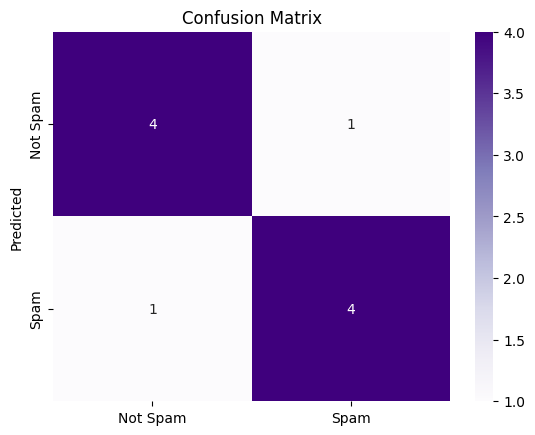

In [1]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_true = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,1,0,1,0]
y_prob = [0.9,0.1,0.8,0.4,0.2,0.85,0.6,0.15,0.7,0.3]

print(classification_report(y_true,y_pred))

acc = accuracy_score(y_true,y_pred)
prec = precision_score(y_true,y_pred)
rec = recall_score(y_true,y_pred)
f1 =  f1_score(y_true,y_pred)

print(f"Accuracy:{acc:.2f}")
print(f"Precision:{prec:.2f}")
print(f"Recall:{rec:.2f}")
print(f"F1 score:{f1:.2f}")

cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples',
            xticklabels=['Not Spam','Spam'],
            yticklabels=['Not Spam','Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.ylabel('Predicted')
plt.show()